In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris, load_breast_cancer, make_circles
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import numpy as np

# Metoda Random Frest

1. W metodzie tej tworzymy wiele, **zróżnicowanych** drzew klasyfikacyjnych, których dokładność musi przekraczać 50%, jednak nie może być też zbyt duża, aby modele były rzeczywiście zróżnicowane.  
2. Każdy z tych modeli budujemy jedynie na **`n` wybranych zmiennych**.
3. Drzewa te połączone są ze sobą **równolegle**
4. Ostateczna klasyfikacja dokonywana jest na drodze głosowania przez poszczególne modele.

![alt text](https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png)


## Sztuczny zestaw danych

W tym przykładzie skorzystamy z dostarczonego przez `sklearn` generatora danych do klasyfikacji `make_circles`


In [0]:
X, y = make_circles(n_samples=1000, factor=.7, noise=.1)

### Podgląd wygenerowanego zestawu

Text(0,0.5,u'$x_2$')

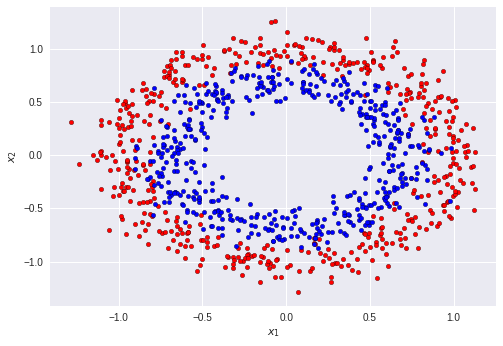

In [0]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[y==1, 0], X[y==1, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

### Sprawdźmy jak poradzi sobie pojedyncze drzewo decyzyjne

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


parameter_grid = {'max_depth': np.arange(3, 30)}

### Your solution
#raise NotImplementedError


clf_grid = GridSearchCV(DecisionTreeClassifier(), parameter_grid)

clf_grid.fit(X_train, y_train)

print ("Najlepsza dokładność {}".format(clf_grid.best_score_))
print ("Dobrane parametry: {}".format(clf_grid.best_params_))

clf_grid.best_estimator_.score(X_test, y_test)

Najlepsza dokładność 0.885074626866
Dobrane parametry: {'max_depth': 8}


0.8939393939393939

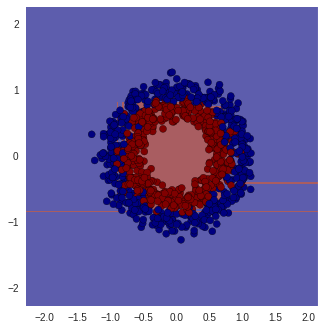

In [0]:
# Parametry
n_classes = 3
plot_step = 0.02


plt.set_cmap(plt.cm.jet)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

clf_tmp = clf_grid.best_estimator_

Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

   
plt.grid(False)

plt.show()


**Krok 1:** Podział danych na dane treningowe i testowe

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


**Krok 2:** Trening klasyfikatora  `RandomForestClassifier` z biblioteki `sklearn`


In [0]:
%%time

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)

CPU times: user 214 ms, sys: 0 ns, total: 214 ms
Wall time: 217 ms


**Krok 3:** Sprawdzenie dokładności modelu

In [0]:
clf.score(X_test, y_test)

0.9181818181818182

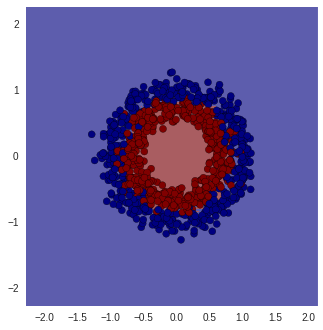

In [0]:
n_classes = 2
plot_step = 0.02


plt.set_cmap(plt.cm.jet)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

clf_tmp = clf

Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

   
plt.grid(False)

plt.show()


## Zależność dokładności od ilości drzew w modelu



In [0]:
train_score = []
test_score = []
for i in range(1, 50, 2):
  clf = RandomForestClassifier(n_estimators=i)
  clf = clf.fit(X_train, y_train)
  train_score.append(clf.score(X_train, y_train))
  test_score.append(clf.score(X_test, y_test))

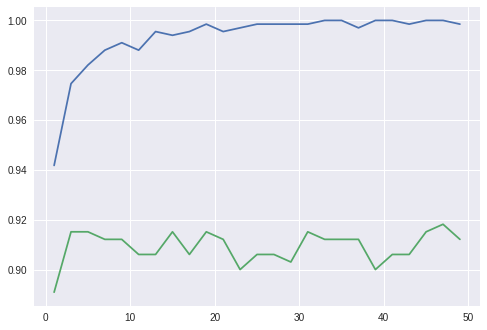

In [0]:
plt.plot(np.arange(1,50, 2), train_score)
plt.plot(np.arange(1,50, 2), test_score)

## Parametry, którymi możemy manipulować

Poza takimi samymi parametrami, jak w przypadku pojedynczego drzewa klasyfikacyjnego, możemy modyfikować parametr **`n_estimators`,**  który określa ile modeli bazowych będzie budowanych.

## Zadanie 1:
Metodą walidacji krzyżowej znajdź optymalne parametry klasyfikatora RandomForest.

In [0]:
parameter_grid = {'max_depth': np.arange(3, 20),
                 'n_estimators':np.arange(5,50, 5)}

### Your solution
#raise NotImplementedError


clf_grid = GridSearchCV(RandomForestClassifier(), parameter_grid)

clf_grid.fit(X_train, y_train)

print ("Najlepsza dokładność na zbiorze treningowym {}".format(clf_grid.best_score_))
print ("Dobrane parametry: {}".format(clf_grid.best_params_))
print ("Dokładność na zbiorze testowym {}".format(clf_grid.best_estimator_.score(X_test, y_test)))

Najlepsza dokładność na zbiorze treningowym 0.907462686567
Dobrane parametry: {'n_estimators': 40, 'max_depth': 11}
Dokładność na zbiorze testowym 0.912121212121


In [0]:
train_score = []
test_score = []
for i in range(1, 50, 2):
  clf = RandomForestClassifier(n_estimators=i, max_depth=10)
  clf = clf.fit(X_train, y_train)
  train_score.append(clf.score(X_train, y_train))
  test_score.append(clf.score(X_test, y_test))

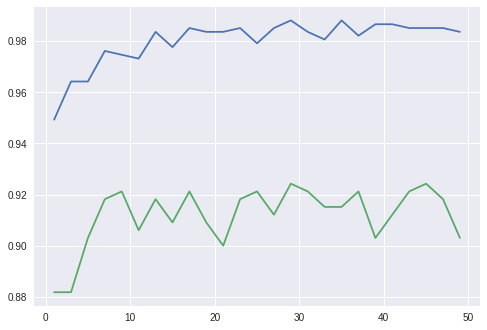

In [0]:
plt.plot(np.arange(1,50, 2), train_score)
plt.plot(np.arange(1,50, 2), test_score)

## Zadaie 2
Przeprowaź podobną analizę dla danych `iris`

In [0]:
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.33, random_state=123)

In [0]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train_iris, y_train_iris)

In [0]:
clf.score(X_test_iris, y_test_iris)

0.94

In [0]:
parameter_grid = {'max_depth': np.arange(3, 20),
                  'max_features': np.arange(1, 3),
                  
                  'n_estimators':np.arange(5,200, 1)}

### Your solution
#raise NotImplementedError


clf_grid = GridSearchCV(RandomForestClassifier(), parameter_grid)

clf_grid.fit(X_train_iris, y_train_iris)

print ("Najlepsza dokładność {}".format(clf_grid.best_score_))
print ("Dobrane parametry: {}".format(clf_grid.best_params_))
print ("Dokładność na zbiorze testowym {}".format(clf_grid.best_estimator_.score(X_test_iris, y_test_iris)))

Najlepsza dokładność 0.97
Dobrane parametry: {'max_features': 1, 'n_estimators': 5, 'max_depth': 12}
Dokładność na zbiorze testowym 0.96


In [0]:
train_score = []
test_score = []
for i in range(1, 50, 2):
  clf = RandomForestClassifier(n_estimators=i, max_depth=9)
  clf = clf.fit(X_train_iris, y_train_iris)
  train_score.append(clf.score(X_train_iris, y_train_iris))
  test_score.append(clf.score(X_test_iris, y_test_iris))

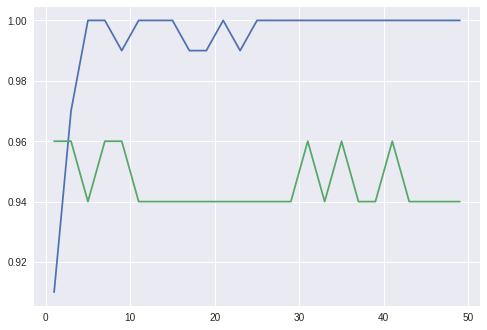

In [0]:
plt.plot(np.arange(1,50, 2), train_score)
plt.plot(np.arange(1,50, 2), test_score)

## Zadaie 3
Przeprowaź podobną analizę dla danych `breast_cancer`

In [0]:
breast = load_breast_cancer()
X_breast, y_breast = breast.data, breast.target
X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(X_breast, y_breast, test_size=0.33, random_state=1)

In [0]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train_breast, y_train_breast)

In [0]:
clf.score(X_test_breast, y_test_breast)

0.9574468085106383

In [0]:
parameter_grid = {'max_depth': np.arange(3, 20),
                  'max_features': np.arange(1, 3),
                  
                  'n_estimators':np.arange(5,100, 10)}

### Your solution
#raise NotImplementedError


clf_grid = GridSearchCV(RandomForestClassifier(), parameter_grid)

clf_grid.fit(X_train_breast, y_train_breast)

print ("Najlepsza dokładność {}".format(clf_grid.best_score_))
print ("Dobrane parametry: {}".format(clf_grid.best_params_))
print ("Dokładność na zbiorze testowym {}".format(clf_grid.best_estimator_.score(X_test_breast, y_test_breast)))

Najlepsza dokładność 0.971128608924
Dobrane parametry: {'max_features': 1, 'n_estimators': 55, 'max_depth': 18}
Dokładność na zbiorze testowym 0.946808510638


In [0]:
train_score = []
test_score = []
for i in range(1, 50, 2):
  clf = RandomForestClassifier(n_estimators=i, max_depth=5)
  clf = clf.fit(X_train_breast, y_train_breast)
  train_score.append(clf.score(X_train_breast, y_train_breast))
  test_score.append(clf.score(X_test_breast,y_test_breast))

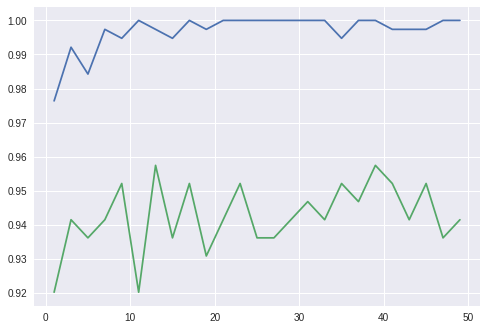

In [0]:
plt.plot(np.arange(1,50, 2), train_score)
plt.plot(np.arange(1,50, 2), test_score)